In [2]:
import cv2
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

## Blob Detection using Laplacian of Gaussian (LOG) and Difference of Gaussian (DOG) Implement blob detection using LOG and DOG methods in Python.Compare the effect of changing the threshold on detected blobs.

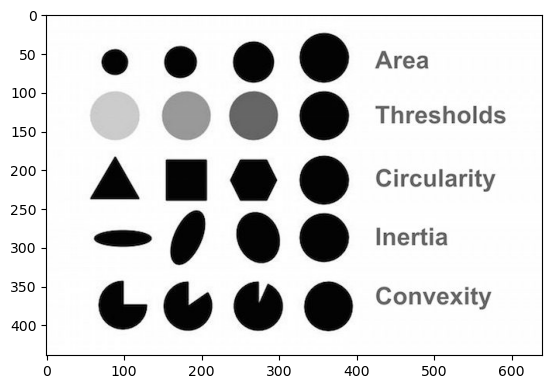

In [12]:
image = cv2.imread('BlobTest.jpg')
plt.imshow(image)
plt.show()

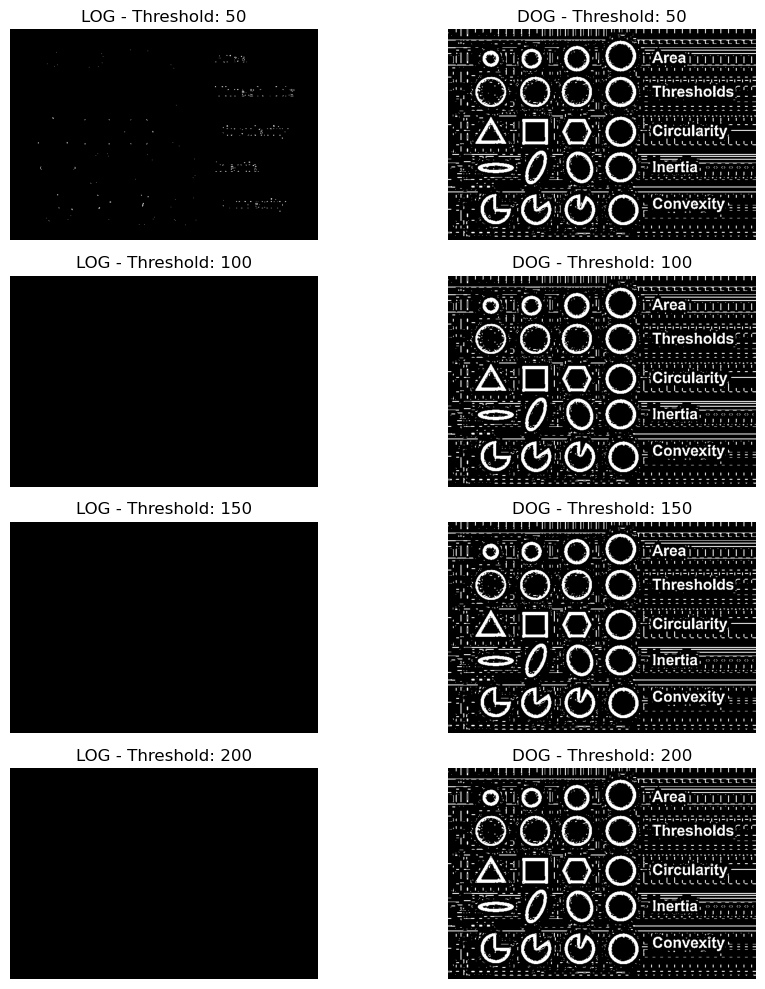

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def laplacian_of_gaussian(image, sigma=1.0):
    if image is None:
        raise ValueError("Image could not be loaded. Please check the image path.")
    
    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    
    # Compute the Laplacian of the blurred image
    laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)
    
    # Convert to a suitable scale for visualization
    return cv2.convertScaleAbs(laplacian)

def difference_of_gaussian(image, sigma1=1.0, sigma2=2.0):
    if image is None:
        raise ValueError("Image could not be loaded. Please check the image path.")
    
    # Apply Gaussian blur with different sigmas
    blurred_image1 = cv2.GaussianBlur(image, (0, 0), sigma1)
    blurred_image2 = cv2.GaussianBlur(image, (0, 0), sigma2)
    
    # Calculate the Difference of Gaussians
    dog = blurred_image1 - blurred_image2
    return dog

def detect_blobs_with_threshold(image, method, threshold):
    """
    Detect blobs using a specified method and thresholding the result.
    :param image: Grayscale input image
    :param method: Either 'LOG' or 'DOG'
    :param threshold: Threshold value to filter blobs
    :return: Blobs after thresholding
    """
    if image is None:
        raise ValueError("Image could not be loaded. Please check the image path.")
    
    if method == 'LOG':
        processed_image = laplacian_of_gaussian(image)
    elif method == 'DOG':
        processed_image = difference_of_gaussian(image)
    
    # Threshold the processed image
    _, binary_blobs = cv2.threshold(processed_image, threshold, 255, cv2.THRESH_BINARY)
    
    # Find contours of detected blobs
    contours, _ = cv2.findContours(binary_blobs, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours, binary_blobs

# Load a grayscale image (check the image path)
image_path = 'BlobTest.jpg'  # Change this to your image file path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded successfully
if image is None:
    print(f"Error: Could not load image at {image_path}. Please check the path and file.")
else:
    # Experiment with different thresholds
    thresholds = [50, 100, 150, 200]

    # Set up the figure for plotting results
    fig, axes = plt.subplots(len(thresholds), 2, figsize=(10, 10))

    for i, threshold in enumerate(thresholds):
        # Perform blob detection using LOG method
        contours_log, binary_log = detect_blobs_with_threshold(image, 'LOG', threshold)
        cv2.drawContours(binary_log, contours_log, -1, (255), 1)
        
        # Perform blob detection using DOG method
        contours_dog, binary_dog = detect_blobs_with_threshold(image, 'DOG', threshold)
        cv2.drawContours(binary_dog, contours_dog, -1, (255), 1)
        
        # Display the results for LOG and DOG with the threshold applied
        axes[i, 0].imshow(binary_log, cmap='gray')
        axes[i, 0].set_title(f'LOG - Threshold: {threshold}')
        axes[i, 0].axis('off')
        
        axes[i, 1].imshow(binary_dog, cmap='gray')
        axes[i, 1].set_title(f'DOG - Threshold: {threshold}')
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()


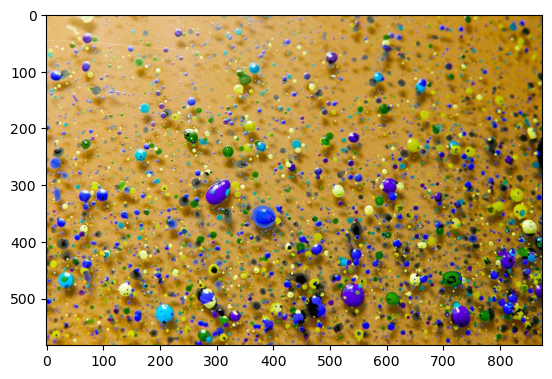

In [5]:
#Blob detection is a process in computer vision where you identify regions in an image that differ in properties like
#color, intensity, or texture compared to surrounding regions
image = cv2.imread('blob.jpg')
plt.imshow(image)
plt.show()

In [ ]:
# Blob Detection using OpenCV's SimpleBlobDetector
# Use OpenCV's SimpleB10bDetector to detect blobs in a grayscale image.
# Experiment with parameters like minArea maxArea , and threshold to detect blobs of
# varying sizes.

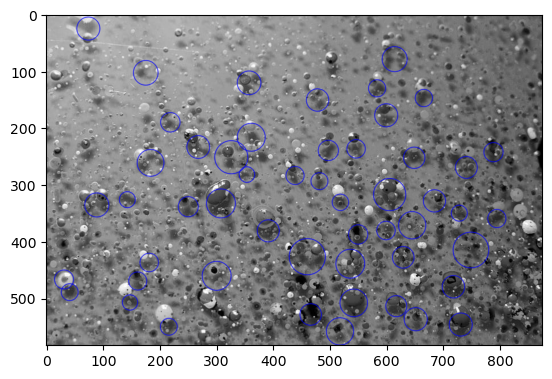

In [13]:
import cv2
import numpy as np

# Load the image in grayscale
image = cv2.imread('blob.jpg', cv2.IMREAD_GRAYSCALE)

# Set up the SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

# Experiment with the parameters:
params.minThreshold = 10      # Minimum intensity threshold to detect blobs
params.maxThreshold = 200     # Maximum intensity threshold
params.minArea = 500          # Minimum area of the blob (in pixels)
params.maxArea = 5000         # Maximum area of the blob
params.minCircularity = 0.1   # Minimum circularity (value between 0 and 1)
params.minConvexity = 0.2     # Minimum convexity (value between 0 and 1)
params.minInertiaRatio = 0.1  # Minimum inertia ratio (value between 0 and 1)

# Create a blob detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

# Draw the detected blobs on the image
output_image = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show the output
plt.imshow(output_image)
plt.show()


In [ ]:
# Blob Detection on Color Images
# Convert a color image to grayscale and detect blobs using blob detection techniques.
# Visualize the detected blobs on the original color image.

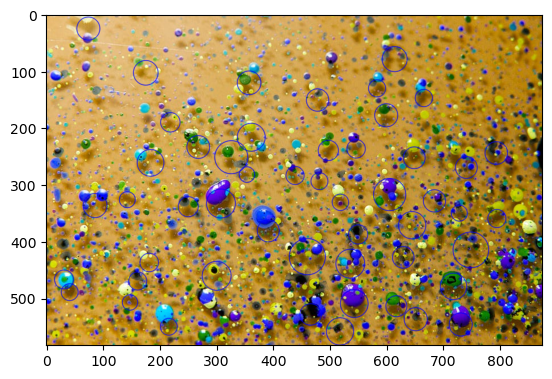

In [15]:


# Load the image (assuming a grayscale image)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Set up parameters for the blob detector
params = cv2.SimpleBlobDetector_Params()
#      threshold values (minThreshold, maxThreshold), area filters (minArea, maxArea), 
#     circularity filters (minCircularity, maxCircularity),
#     convexity filters (minConvexity, maxConvexity), and inertia ratio filters (minInertiaRatio, maxInertiaRatio)

# Set thresholds (min and max)
params.minThreshold = 10
params.maxThreshold = 200

# Set minimum and maximum area for blobs
params.minArea = 500
params.maxArea = 5000

# Set circularity (0 is less circular, 1 is more circular)
params.minCircularity = 0.1

# Set convexity (1 means completely convex)
params.minConvexity = 0.2

# Set inertia ratio (for elongated shapes)
params.minInertiaRatio = 0.1

# Create the detector with the specified parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

# Draw detected blobs on the image
output_image = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show the result
plt.imshow(output_image, cmap="gray")
plt.show()


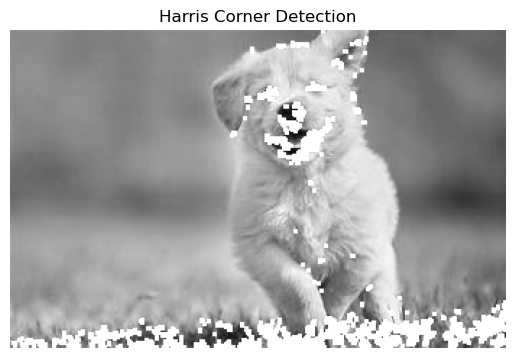

In [17]:
image = cv2.imread('dog.jpg', cv2.IMREAD_GRAYSCALE)
# Check if image was loaded correctly
if image is None:
    print("Error: Could not load image.")
    exit()

# Apply Harris corner detection
# Parameters: blockSize, ksize, k (free parameter)
block_size = 2
ksize = 3
k = 0.04

# Harris corner detection
corners = cv2.cornerHarris(image, block_size, ksize, k)

# Dilate to mark the corners
corners = cv2.dilate(corners, None)

# Apply thresholding to detect corners
threshold = 0.01 * corners.max()  # You can modify this threshold to experiment with corner strength
image_with_corners = np.copy(image)
image_with_corners[corners > threshold] = 255

# Display the image with corners detected
plt.imshow(image_with_corners, cmap='gray')
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

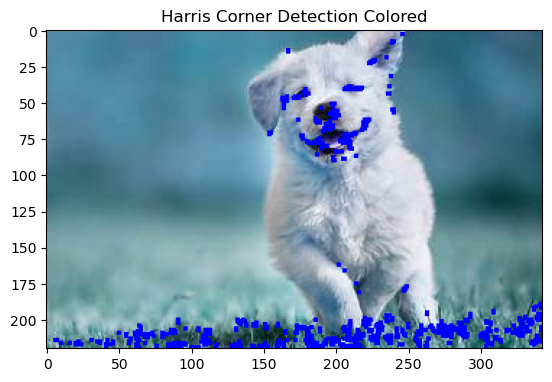

In [4]:
# Python program to illustrate 
# corner detection with 
# Harris Corner Detection Method 

# path to input image specified and 
# image is loaded with imread command 
image = cv2.imread('dog.jpg') 

# convert the input image into 
# grayscale color space 
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# modify the data type 
# setting to 32-bit floating point 
operatedImage = np.float32(operatedImage) 

# apply the cv2.cornerHarris method 
# to detect the corners with appropriate 
# values as input parameters 
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07) 

# Results are marked through the dilated corners 
dest = cv2.dilate(dest, None) 

# Reverting back to the original image, 
# with optimal threshold value 
image[dest > 0.01 * dest.max()]=[0, 0, 255] 

# the window showing output image with corners 
plt.imshow(image) 
plt.title('Harris Corner Detection Colored')
plt.show()

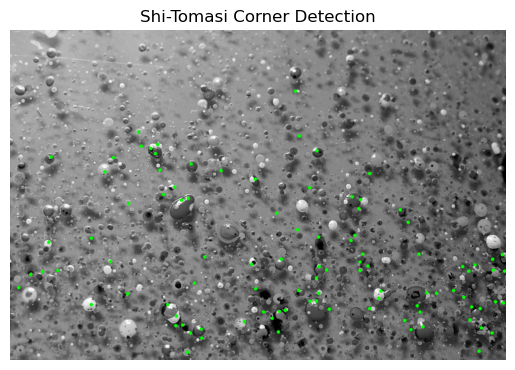

In [7]:
# Load the image (ensure it's in grayscale)
image = cv2.imread('blob.jpg', cv2.IMREAD_GRAYSCALE)

# Check if image was loaded correctly
if image is None:
    print("Error: Could not load image.")
    exit()

# Parameters for Shi-Tomasi Corner Detection
max_corners = 100  # Maximum number of corners to detect
quality_level = 0.01  # Minimum quality of the corners (higher means more distinctive corners)
min_distance = 10  # Minimum distance between detected corners

# Apply Shi-Tomasi corner detection using goodFeaturesToTrack
corners_shi_tomasi = cv2.goodFeaturesToTrack(image, max_corners, quality_level, min_distance)

# Convert the result to a format that can be drawn (corners are in float32)
corners_shi_tomasi = np.intp(corners_shi_tomasi)

# Create a copy of the image to draw the detected corners
image_shi_tomasi = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw the corners
for corner in corners_shi_tomasi:
    x, y = corner.ravel()
    cv2.circle(image_shi_tomasi, (x, y), 3, (0, 255, 0), -1)

# Display the image with detected corners
plt.imshow(image_shi_tomasi)
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')
plt.show()
